# Moringa School Week 12 Independent Project 

# Defining the Question 

1. **Specifying the Question** 

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 



2. **Defining the metric for success**

This project will considered successful if we are able to identify the people who are likely to click on the ad. 

3. **Understanding the context**

This project is being done on behalf of a Kenyan This project is being done on behalf of a Kenyan entrepreneur who has created an online cryptography course, the aim is to try and identify which individuals are most likely to click on the entrepreneur's ad. The plan is to draw insights from the univariate and bivariate analysis.

4. **Recording the experimental design**

Below are the steps we shall follow: 
*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Conclusion and recommendations 

5. **Data Relevance** 

The data provided is relevant for our analysis. We will used data provided by the entrepreneur from past ads.

# Reading the Data 

In [6]:
#Installing packages 
#

install.packages("data.table")
require(data.table)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table



In [7]:
#Loading our data
#http://bit.ly/IPAdvertisingData
#

url = 'http://bit.ly/IPAdvertisingData'
df <- fread(url)

# Checking the Data 

In [8]:
#Previewing our dataset 
#


head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [9]:
#Checking the data type of each column 
#

str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


The priority columns all have appropriate data types.

---



# Tidying the Dataset 

In [10]:
#Checking for missing values 
#

colSums(is.na(df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

They're no missing values in our dataset. 

In [11]:
#Checking for duplicates 
#

duplicated(df)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

The dataset also has no duplicated values.

In [12]:
#Preview the column names 
#

colnames(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [13]:
#Renaming the column 
#

names(df)[names(df) == "Daily Time Spent on Site"] <- "Daily_Time_Spent_on_Site"
names(df)[names(df) == "Area Income"] <- "Area_Income"
names(df)[names(df) == "Daily Internet Usage"] <- "Daily_Internet_Usage"
names(df)[names(df) == "Ad Topic Line"] <- "Ad_Topic_Line"
head(df)

Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


Our column names are now in a form that is easier to work with. 

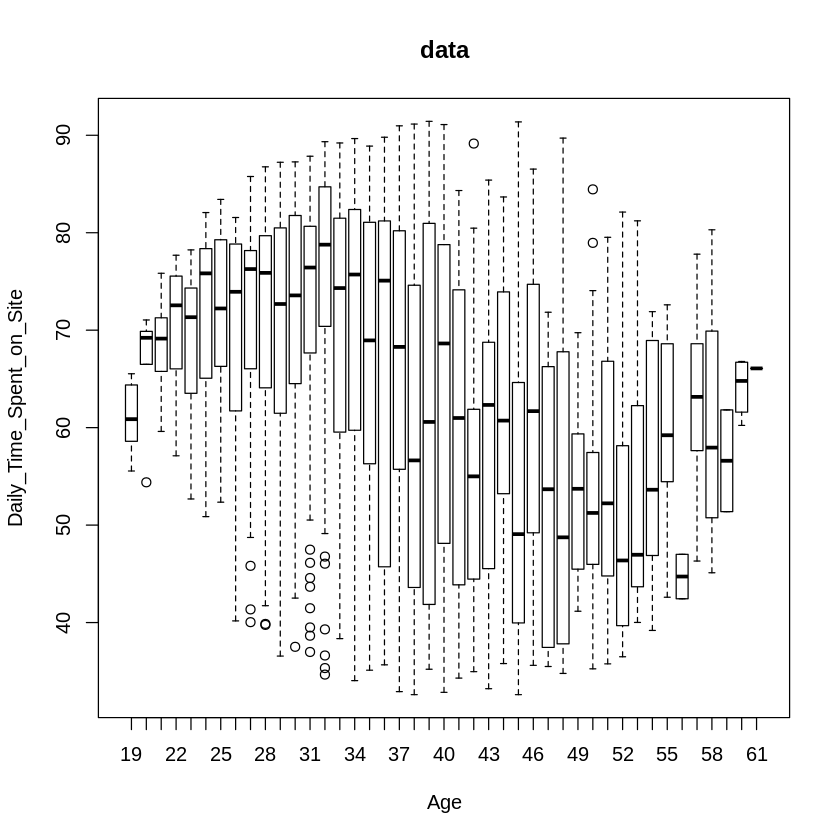

In [14]:
#Checking for outliers 
#'Daily_Time_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country', 'Timestamp'
#

boxplot(Daily_Time_Spent_on_Site ~ Age, data = df, xlab = "Age",
   ylab = "Daily_Time_Spent_on_Site", main = "data")


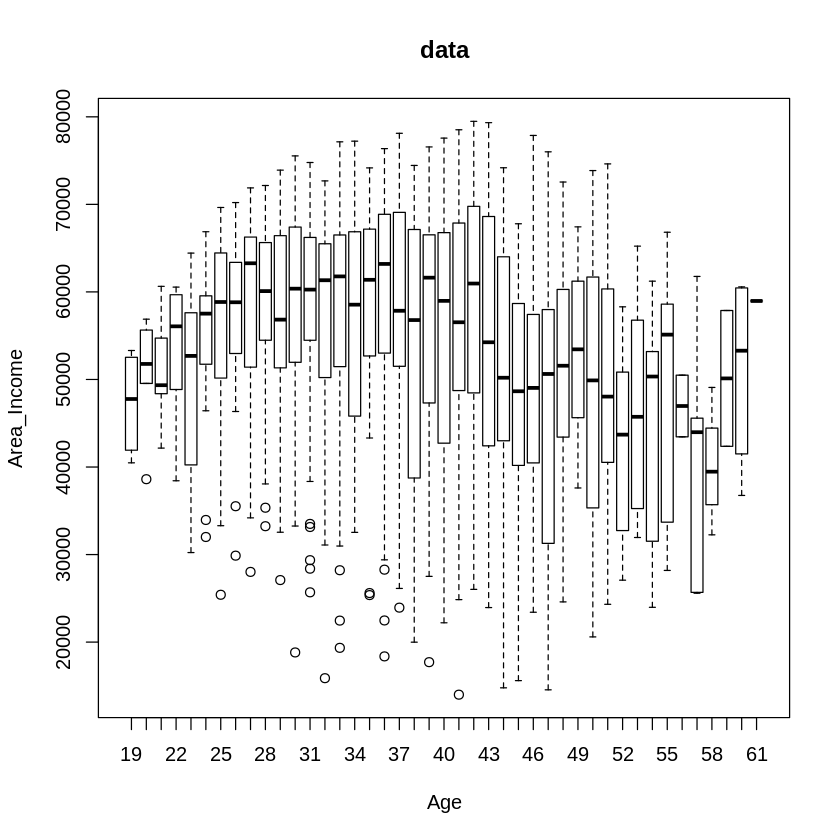

In [15]:
boxplot(Area_Income ~ Age, data = df, xlab = "Age",
   ylab = "Area_Income", main = "data")

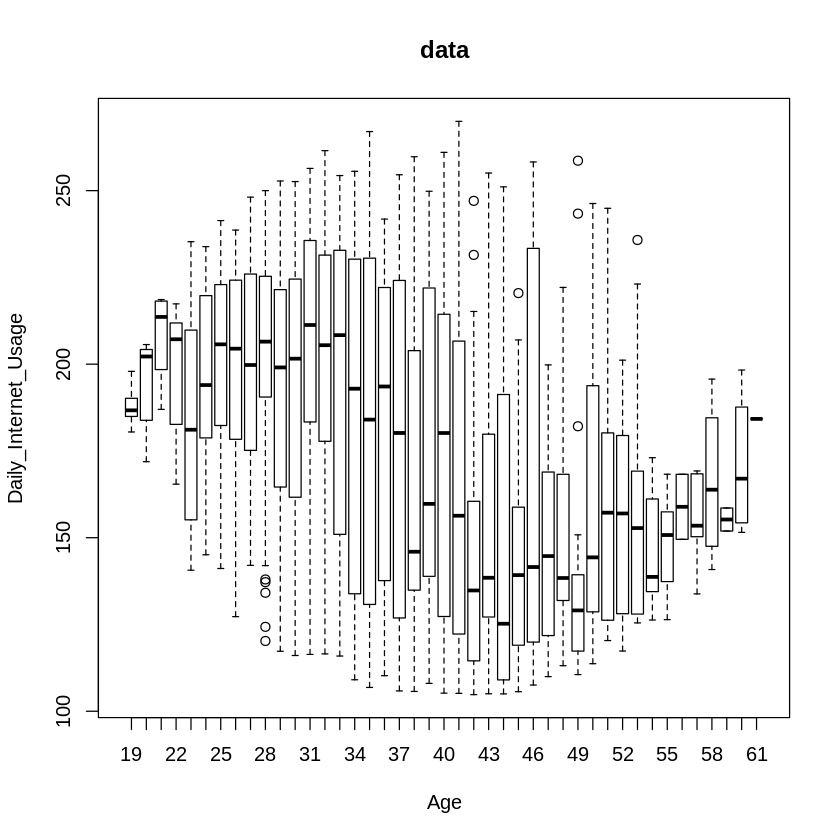

In [17]:
boxplot(Daily_Internet_Usage ~ Age, data = df, xlab = "Age",
   ylab = "Daily_Internet_Usage", main = "data")


I decided not to drop the outliers, I will hence use appropriate methods during my analysis. i.e look at both the mean and median during univariate analysis.

# Exploratory Analysis 

In [18]:
#Previewing the dataset
#

head(df, 4)

Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0


## univariate analysis

During **univariate analysis**, we are going to calculate the:
1. Measures of central tendency (mode, median, mean)
2. Measures of dispersion (range, the interquartile range, the standard deviation, variance, skewness, and kurtosis) 
3. Visualize some columns 


We shall be concentarting on the following columns;
1. Daily_Time_Spent_on_Site 
2. Age*
3. Area_Income
4. Male*
5. Country*
6. City 

Columns such as 'Daily_Internet_Usage' are probably dependent on the income and age of the user hence why we did not see the need of looking at it in detailed. While columns as Timestamp are not relevant to our analysis because the client only asked us to identify which individuals are most likely to click on her ads. 




In [19]:
#Analysis of the Age column
#Measures of central tendency

Mean.Age <- mean(df$Age)
Mean.Age

[1] 36.009

In [20]:
median.Age <- median(df$Age)
median.Age

[1] 35

In [21]:
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
Mode.Age <- getmode(df$Age)
Mode.Age

[1] 31

In [22]:
# Measures of dispersion
#

# Minimum
Age.min <- min(df$Age)
Age.min



[1] 19



Incase the client wants to increase their client base, I would recommend that they approach the 19 yesr olds and the 61 years olds who previously clicked on the ad: find out why the clicked and see if the is something the client can do to attract more people in that age bracket.

In [23]:
# Maximum
#

Age.max <- max(df$Age)
Age.max


[1] 61

In [24]:
# Range
Age.range <- range(df$Age)
Age.range

[1] 19 61

In [26]:
# Quantiles
Age.quant <- quantile(df$Age)
Age.quant

0%  25%  50%  75% 100% 
  19   29   35   42   61

In [27]:
# Variance
Age.var <- var(df$Age)
Age.var

[1] 77.18611

In [28]:
# Standard deviation 
Age.std <- sd(df$Age)
Age.std

[1] 8.785562

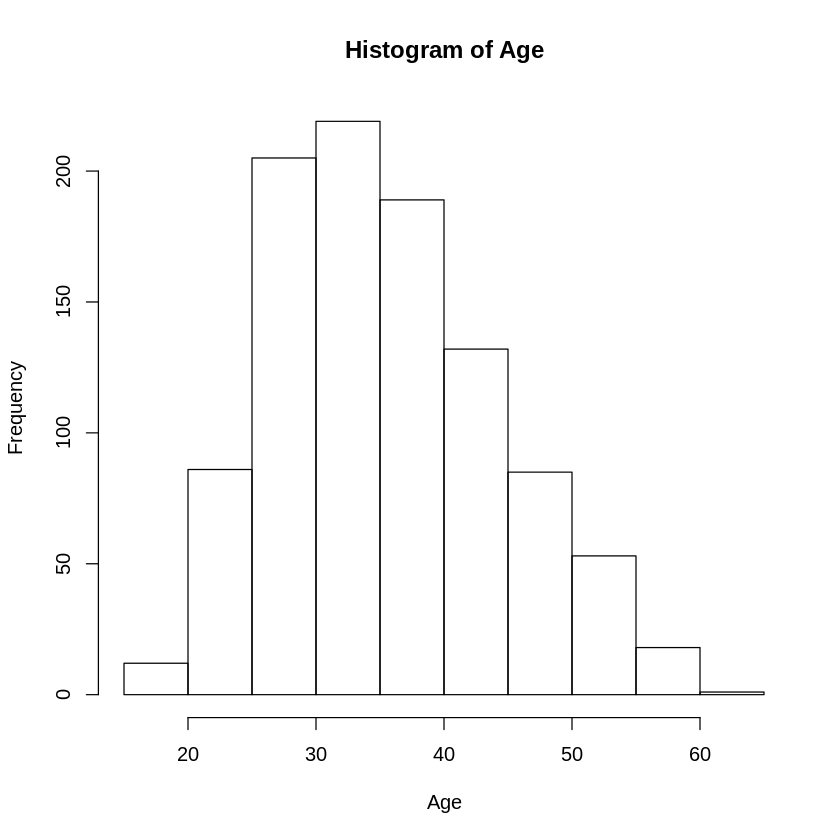

In [29]:
# Plotting a histogram 
Age <- df$Age
hist(Age)

- Note that the data is slightly skewed to the right
- The age group that is likely to frequently click on the ad is between 28-44 years with the majority being around 36 years old. 


In [ ]:
#Graphical
#'Ad_Topic_Line', 'Male', 'City', 'Country'

# fetch the country column
Country <- df$Country

#Generating a table
Country_frequency <- table(Country)
print(Country_frequency)

Country
                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                      

- Top 10 countries which produced the highest number of people who clicked on the ad:

1. Peru
2. Albania
3. Australia 
4. Turkey 
5. South Africa
6. Burundi
7. Cambodia
8. Senegal
9. Greece
10. Liberia

The top counties has either 8 or 7 clicks. 

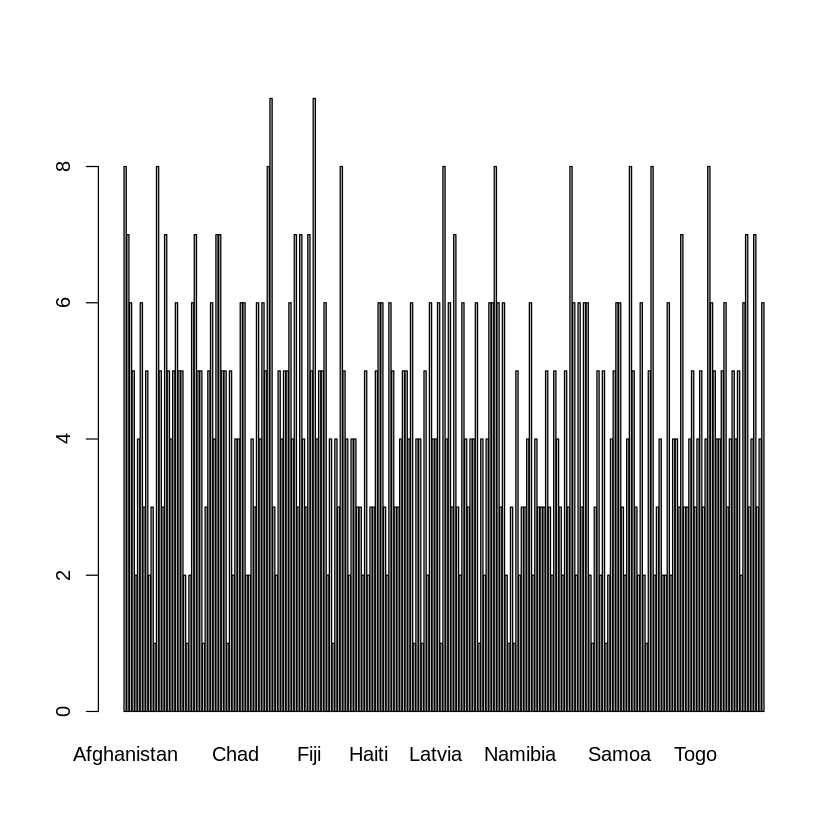

In [ ]:
# bar plots
barplot(Country_frequency)

In [ ]:
#Fetching the Male column
Male <- df$Male

#Generating a table
Male_frequency <- table(Male)
Male_frequency

Male
  0   1 
519 481 

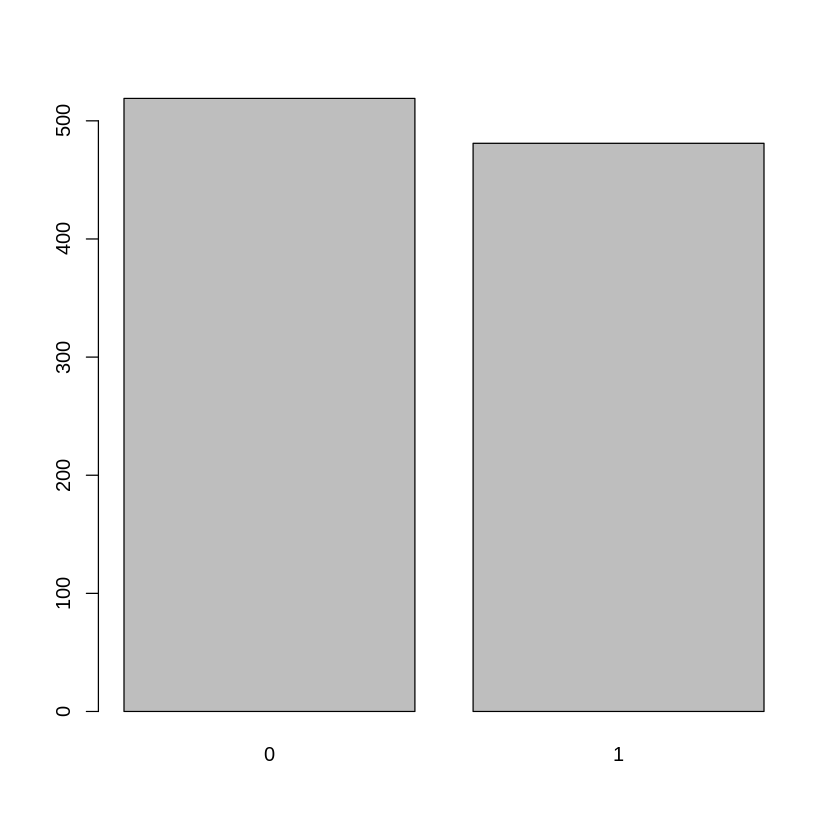

In [ ]:
# bar plots
barplot(Male_frequency)

The gender of the people that clicked on the ad is almost balanced. 

## Bivariate analysis

Bivariate analysis is the analysis of two variables, we are going to investigate the individual relationship between the following variables:
1. 'Daily_Time_Spent_on_Site' vs 'Age'
2. 'Area_Income' vs 'Daily_Time_Spent_on_Site'
3. 'Age' vs 'Daily_Internet_Usage'
4. 'Area_Income' vs 'Area_Income'

We will also be generating a correlation matrix.

In [ ]:
# 'Daily_Time_Spent_on_Site' vs 'Age'


# find the covariance 
b <- df$Daily_Time_Spent_on_Site
h <- df$Age
cov(b, h)

[1] -46.17415

In [ ]:
# find the correlation 

b <- df$Daily_Time_Spent_on_Site
h <- df$Age
cor(b, h)
#cor(Daily_Time_Spent_on_Site, Age)

[1] -0.3315133

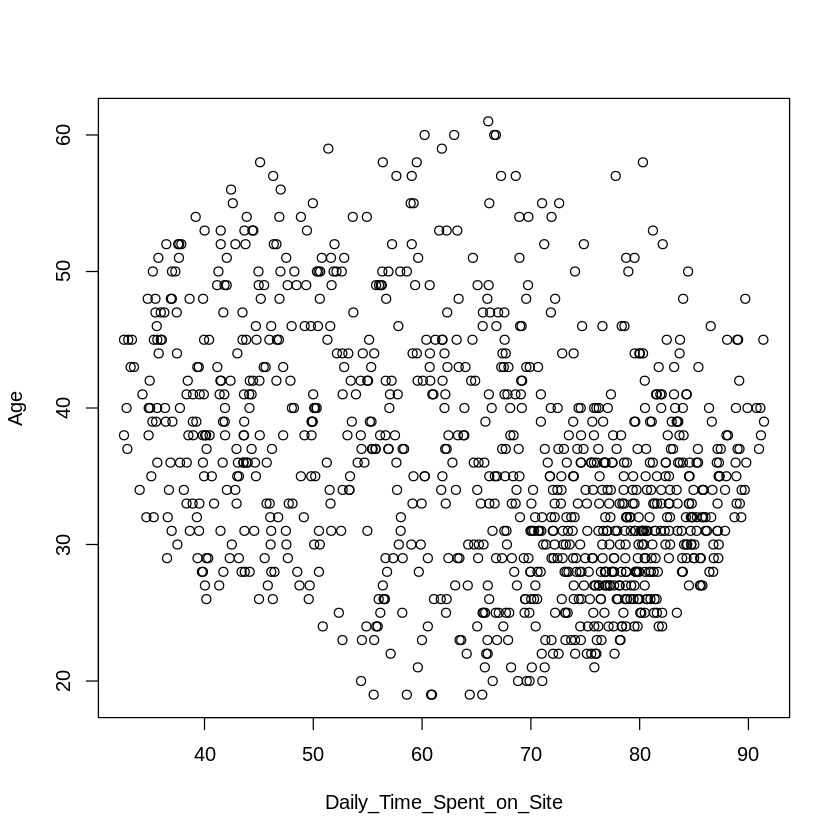

In [ ]:
#scatter plot

#plot(eruptions, waiting, xlab="Eruption duration", ylab="Time waited")
plot(b, h, xlab="Daily_Time_Spent_on_Site", ylab="Age")

- Age had not influence on the daily time spent on the site. 

In [ ]:
# 'Daily_Time_Spent_on_Site' vs 'Area_Income' 


# find the covariance 
b <- df$Daily_Time_Spent_on_Site
h <- df$Area_Income
cov(b, h)

[1] 66130.81

In [ ]:
# find the correlation 

b <- df$Daily_Time_Spent_on_Site
h <- df$Area_Income
cor(b, h)


[1] 0.3109544

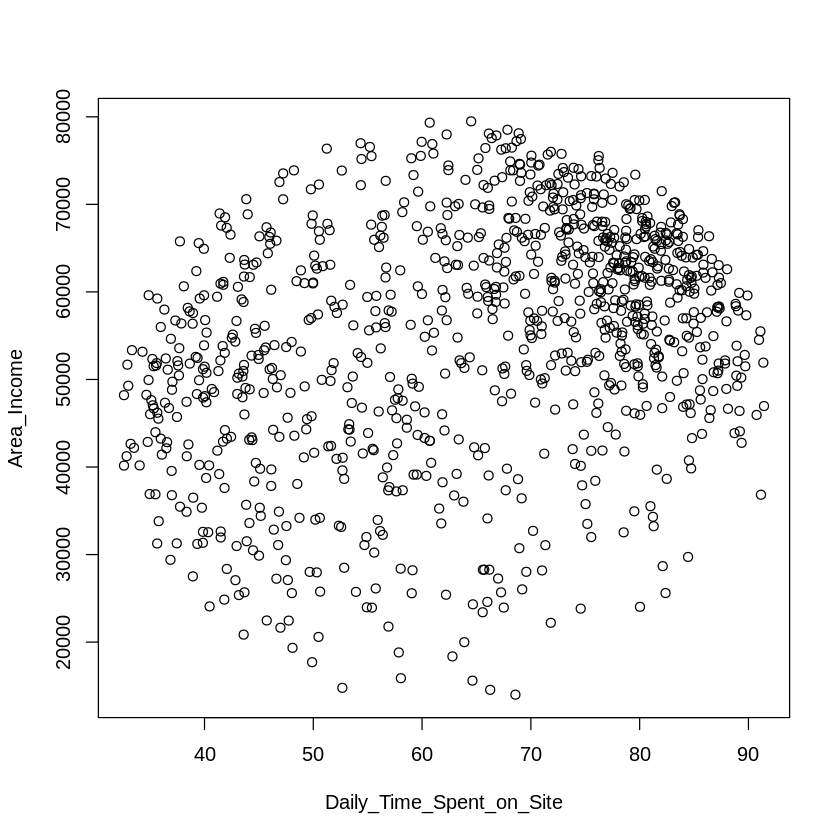

In [ ]:
#scatter plot

#plot(eruptions, waiting, xlab="Eruption duration", ylab="Time waited")
plot(b, h, xlab="Daily_Time_Spent_on_Site", ylab="Area_Income")

- Area income had no influence on the daily time spent on the site.

In [ ]:
# 'Daily_Internet_Usage' vs 'Age' 

# find the covariance 
b <- df$Daily_Internet_Usage
h <- df$Age
cov(b, h)

[1] -141.6348

In [ ]:
# find the correlation 

b <- df$Daily_Internet_Usage
h <- df$Age
cor(b, h)


[1] -0.3672086

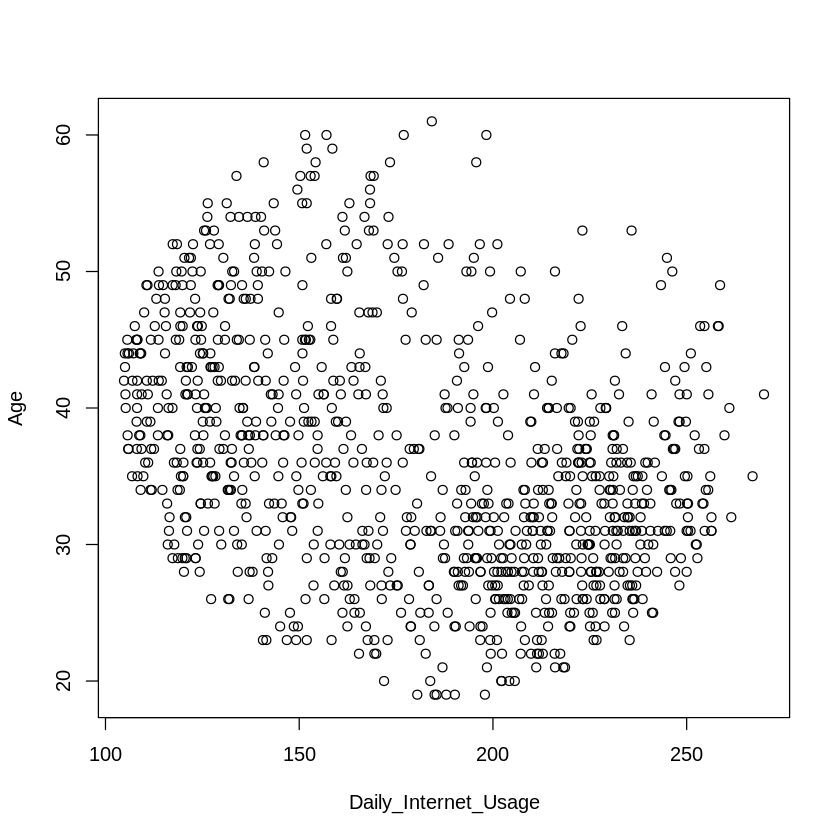

In [ ]:
#scatter plot

#plot(eruptions, waiting, xlab="Eruption duration", ylab="Time waited")
plot(b, h, xlab="Daily_Internet_Usage", ylab="Age")

- Age had no influence on the daily internet usage. 

# Conclusion and Recommendation

1. Incase the client wants to increase their client base, I would recommend that they approach the 19 yesr olds and the 61 years olds who previously clicked on the ad: find out why the clicked and see if the is something the client can do to attract more people in that age bracket.

2. The age group that is likely to frequently click on the ad is between 28-44 years with the majority being around 36 years old. I would advice that the client makes the ad tailored to this group, this will help ensure she does not lose her already existing target market.

3. Top 10 countries which produced the highest number of people who clicked on the ad:
- Peru
- Albania
- Australia 
- Turkey 
- South Africa
- Burundi
- Cambodia
- Senegal
- Greece
- Liberia
The top counties has either 8 or 7 clicks. 
My recommendation to the client would be to consider availing subtitles that are in the commonly spoken language in the top countries. 

4. Lastly, the gender of the people that clicked on the ad is almost balanced. As a result i recommend that the client ensures the ad is appealing to both genders.  